In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# EDA
1. Set some constants 
2. Understand what targets there by observing directories
    - Number of files in each directory
3. Print a couple images from each directory

In [3]:
TRAIN_BASE_DIR = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset/the_wildfire_dataset/train'
VAL_BASE_DIR = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset/the_wildfire_dataset/val'
TEST_BASE_DIR = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset/the_wildfire_dataset/test'

CSV_FILE = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset.csv'

TRAIN_FIRE_BOTH = os.path.join(TRAIN_BASE_DIR, 'fire/Both_smoke_and_fire')
TRAIN_FIRE_SMOKE = os.path.join(TRAIN_BASE_DIR, 'fire/Smoke_from_fires')
TRAIN_NOFIRE_NOFIRE_CONFOUNDING = os.path.join(TRAIN_BASE_DIR, 'nofire/Fire_confounding_elements')
TRAIN_NOFIRE_NOFIRE_FORESTED = os.path.join(TRAIN_BASE_DIR, 'nofire/Forested_areas_without_confounding_elements')
TRAIN_NOFIRE_NOFIRE_SMOKE = os.path.join(TRAIN_BASE_DIR, 'nofire/Smoke_confounding_elements')

VAL_FIRE_BOTH = os.path.join(VAL_BASE_DIR, 'fire/Both_smoke_and_fire')
VAL_FIRE_SMOKE = os.path.join(VAL_BASE_DIR, 'fire/Smoke_from_fires')
VAL_NOFIRE_NOFIRE_CONFOUNDING = os.path.join(VAL_BASE_DIR, 'nofire/Fire_confounding_elements')
VAL_NOFIRE_NOFIRE_FORESTED = os.path.join(VAL_BASE_DIR, 'nofire/Forested_areas_without_confounding_elements')
VAL_NOFIRE_NOFIRE_SMOKE = os.path.join(VAL_BASE_DIR, 'nofire/Smoke_confounding_elements')

TEST_FIRE_BOTH = os.path.join(TEST_BASE_DIR, 'fire/Both_smoke_and_fire')
TEST_FIRE_SMOKE = os.path.join(TEST_BASE_DIR, 'fire/Smoke_from_fires')
TEST_NOFIRE_NOFIRE_CONFOUNDING = os.path.join(TEST_BASE_DIR, 'nofire/Fire_confounding_elements')
TEST_NOFIRE_NOFIRE_FORESTED = os.path.join(TEST_BASE_DIR, 'nofire/Forested_areas_without_confounding_elements')
TEST_NOFIRE_NOFIRE_SMOKE = os.path.join(TEST_BASE_DIR, 'nofire/Smoke_confounding_elements')


## Labels

Qualitative Observations:
There are two basic labels, fire and no-fire. Both classes have sub-classes:
* fire
  - Both_smoke_and_fire
  - Smoke_from_fires
* nofire
  - Fire_confounding_elements
  - Forested_areas_without_confounding_elements
  - Smoke_confounding_elements
  
/test/fire <br>
/test/fire/Both_smoke_and_fire <br>
/test/fire/Smoke_from_fires <br>
/test/nofire <br>
/test/nofire/Fire_confounding_elements <br>
/test/nofire/Forested_areas_without_confounding_elements <br>
/test/nofire/Smoke_confounding_elements <br>

In [4]:
## Have a look at the directory structure (equivalent to targets)
file_counter = 0
directories = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    file_counter += 1
    directories.append(dirname)

print(f'Number of files: {file_counter}')
print(f'Number unique dirs: {len(set(directories))}')

## Function to remove previous directories
def remove_from_path(s, full_path):
    return full_path.replace(f'/{s}', '')

base_dirs = []
dirs_to_remove = ['kaggle', 'input', 'the-wildfire-dataset', 'the_wildfire_dataset', 'the_wildfire_dataset']

directories = set(directories)
for directory in directories:
    temp = directory
    for s in dirs_to_remove:
        temp = remove_from_path(s, temp)
        
    if temp:
        base_dirs.append(temp)

print(f"Unique dirs: ")
print('\n'.join(sorted(base_dirs)))


        


Number of files: 28
Number unique dirs: 28
Unique dirs: 
/test
/test/fire
/test/fire/Both_smoke_and_fire
/test/fire/Smoke_from_fires
/test/nofire
/test/nofire/Fire_confounding_elements
/test/nofire/Forested_areas_without_confounding_elements
/test/nofire/Smoke_confounding_elements
/train
/train/fire
/train/fire/Both_smoke_and_fire
/train/fire/Smoke_from_fires
/train/nofire
/train/nofire/Fire_confounding_elements
/train/nofire/Forested_areas_without_confounding_elements
/train/nofire/Smoke_confounding_elements
/val
/val/fire
/val/fire/Both_smoke_and_fire
/val/fire/Smoke_from_fires
/val/nofire
/val/nofire/Fire_confounding_elements
/val/nofire/Forested_areas_without_confounding_elements
/val/nofire/Smoke_confounding_elements


In [5]:
## Train dataset
## Fire dirs
len_fire_both = len([name for name in os.listdir(TRAIN_FIRE_BOTH) if os.path.isfile(os.path.join(TRAIN_FIRE_BOTH, name))])
print('Both_smoke_and_fire: ', len_fire_both)
len_fire_smoke = len([name for name in os.listdir(TRAIN_FIRE_SMOKE) if os.path.isfile(os.path.join(TRAIN_FIRE_SMOKE, name))])
print('Smoke_from_fires: ', len_fire_smoke)
print('**Total fire train: ', len_fire_both + len_fire_smoke, end='\n'*2)

## No fire dirs
len_nofire_confounding = len([name for name in os.listdir(TRAIN_NOFIRE_NOFIRE_CONFOUNDING) if os.path.isfile(os.path.join(TRAIN_NOFIRE_NOFIRE_CONFOUNDING, name))])
print('Fire_confounding_elements: ', len_nofire_confounding)
len_nofire_forested = len([name for name in os.listdir(TRAIN_NOFIRE_NOFIRE_FORESTED) if os.path.isfile(os.path.join(TRAIN_NOFIRE_NOFIRE_FORESTED, name))])
print('Forested_areas_without_confounding_elements: ', len_nofire_forested)
len_no_fire_smoke = len([name for name in os.listdir(TRAIN_NOFIRE_NOFIRE_SMOKE) if os.path.isfile(os.path.join(TRAIN_NOFIRE_NOFIRE_SMOKE, name))])
print('Smoke_confounding_elements: ', len_no_fire_smoke)
print('**Total nofire train: ', len_nofire_confounding + len_nofire_forested + len_no_fire_smoke, end='\n')
print('**Total train: ', len_nofire_confounding + len_nofire_forested + len_no_fire_smoke + len_fire_both + len_fire_smoke )
print('\n'*3)


## Validation dataset
## Fire dirs
len_fire_both = len([name for name in os.listdir(VAL_FIRE_BOTH) if os.path.isfile(os.path.join(VAL_FIRE_BOTH, name))])
print('Both_smoke_and_fire: ', len_fire_both)
len_fire_smoke = len([name for name in os.listdir(VAL_FIRE_SMOKE) if os.path.isfile(os.path.join(VAL_FIRE_SMOKE, name))])
print('Smoke_from_fires: ', len_fire_smoke)
print('**Total fire val: ', len_fire_both + len_fire_smoke, end='\n'*2)

## No fire dirs
len_nofire_confounding = len([name for name in os.listdir(VAL_NOFIRE_NOFIRE_CONFOUNDING) if os.path.isfile(os.path.join(VAL_NOFIRE_NOFIRE_CONFOUNDING, name))])
print('Fire_confounding_elements: ', len_nofire_confounding)
len_nofire_forested = len([name for name in os.listdir(VAL_NOFIRE_NOFIRE_FORESTED) if os.path.isfile(os.path.join(VAL_NOFIRE_NOFIRE_FORESTED, name))])
print('Forested_areas_without_confounding_elements: ', len_nofire_forested)
len_no_fire_smoke = len([name for name in os.listdir(VAL_NOFIRE_NOFIRE_SMOKE) if os.path.isfile(os.path.join(VAL_NOFIRE_NOFIRE_SMOKE, name))])
print('Smoke_confounding_elements: ', len_no_fire_smoke)
print('**Total nofire val: ', len_nofire_confounding + len_nofire_forested + len_no_fire_smoke, end='\n')
print('**Total val: ', len_nofire_confounding + len_nofire_forested + len_no_fire_smoke + len_fire_both + len_fire_smoke )
print('\n'*3)

## Test dataset
## Fire dirs
len_fire_both = len([name for name in os.listdir(TEST_FIRE_BOTH) if os.path.isfile(os.path.join(TEST_FIRE_BOTH, name))])
print('Both_smoke_and_fire: ', len_fire_both)
len_fire_smoke = len([name for name in os.listdir(TEST_FIRE_SMOKE) if os.path.isfile(os.path.join(TEST_FIRE_SMOKE, name))])
print('Smoke_from_fires: ', len_fire_smoke)
print('**Total fire TEST: ', len_fire_both + len_fire_smoke, end='\n')

## No fire dirs
len_nofire_confounding = len([name for name in os.listdir(TEST_NOFIRE_NOFIRE_CONFOUNDING) if os.path.isfile(os.path.join(TEST_NOFIRE_NOFIRE_CONFOUNDING, name))])
print('Fire_confounding_elements: ', len_nofire_confounding)
len_nofire_forested = len([name for name in os.listdir(TEST_NOFIRE_NOFIRE_FORESTED) if os.path.isfile(os.path.join(TEST_NOFIRE_NOFIRE_FORESTED, name))])
print('Forested_areas_without_confounding_elements: ', len_nofire_forested)
len_no_fire_smoke = len([name for name in os.listdir(TEST_NOFIRE_NOFIRE_SMOKE) if os.path.isfile(os.path.join(TEST_NOFIRE_NOFIRE_SMOKE, name))])
print('Smoke_confounding_elements: ', len_no_fire_smoke)
print('**Total nofire TEST: ', len_nofire_confounding + len_nofire_forested + len_no_fire_smoke, end='\n')
print('**Total TEST: ', len_nofire_confounding + len_nofire_forested + len_no_fire_smoke + len_fire_both + len_fire_smoke )


Both_smoke_and_fire:  269
Smoke_from_fires:  461
**Total fire train:  730

Fire_confounding_elements:  236
Forested_areas_without_confounding_elements:  591
Smoke_confounding_elements:  330
**Total nofire train:  1157
**Total train:  1887




Both_smoke_and_fire:  58
Smoke_from_fires:  99
**Total fire val:  157

Fire_confounding_elements:  50
Forested_areas_without_confounding_elements:  127
Smoke_confounding_elements:  69
**Total nofire val:  246
**Total val:  403




Both_smoke_and_fire:  59
Smoke_from_fires:  100
**Total fire TEST:  159
Fire_confounding_elements:  52
Forested_areas_without_confounding_elements:  128
Smoke_confounding_elements:  71
**Total nofire TEST:  251
**Total TEST:  410


In [11]:
df = pd.read_csv(CSV_FILE)
## Rename to something easier to work with
column_names = {'Image Name': 'name', 'Download Source URL': 'url', 'Image Resolution': 'resolution'}
renamed_df = df.rename(columns=column_names)
# print(renamed_df)

## Number unique websites for images
websites = np.unique(renamed_df.url.str.extract(r'(https://[A-z]*.[A-z]*.)').dropna())
print(f'Websites: {websites}')
# num_websites_zero = renamed_df[renamed_df.url.str.extract(r'(https://[A-z]*.[A-z]*.)') == websites[0]]
# num_websites_one = renamed_df[renamed_df.url.str.extract(r'(https://[A-z]*.[A-z]*.)') == websites[1]]

# print(f'Number of websites for {websites[0]}: {num_websites_zero}')
# print(f'Number of websites for {websites[1]}: {num_websites_one}')

np.unique(renamed_df.url.str.extract(r'(https://[A-z]*.[A-z]*.)'), return_counts=True)


Websites: ['https://unsplash.com/' 'https://www.flickr.']


(array(['https://unsplash.com/', 'https://www.flickr.'], dtype=object),
 array([1514, 1187]))

## DISPLAY SOME IMAGES

In [74]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob as glob
from PIL import Image
import random

## Helper functions
def display_images(directory):
    images = os.listdir(directory)
    file_names = random.choices(images, k=3)
    f, axarr = plt.subplots(1, 3)
    img1_path = os.path.join(directory, file_names[0])
    img2_path = os.path.join(directory, file_names[1])
    img3_path = os.path.join(directory, file_names[2])
    img1 = np.asarray(Image.open(img1_path))
    img2 = np.asarray(Image.open(img2_path))
    img3 = np.asarray(Image.open(img3_path))
    

    axarr[0].imshow(img1)
    axarr[0].set_axis_off()
    axarr[1].imshow(img2)
    axarr[1].set_axis_off()
    axarr[2].imshow(img3)
    axarr[2].set_axis_off()
    


## Fire - Both smoke and fire

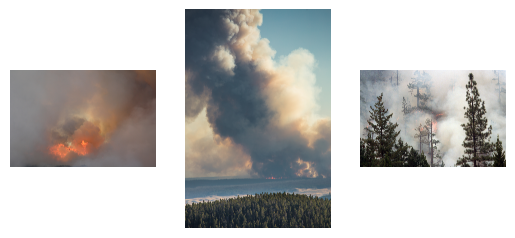

In [80]:
display_images(TRAIN_FIRE_BOTH)

## Fire - Smoke from fire

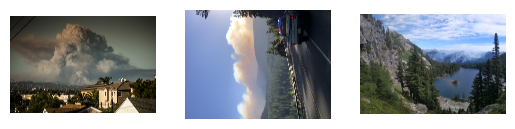

In [75]:
display_images(TRAIN_FIRE_SMOKE)

## No Fire - Fire confounding elements

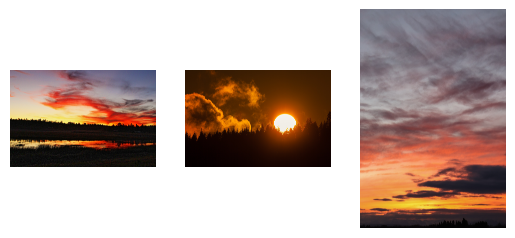

In [77]:
display_images(TRAIN_NOFIRE_NOFIRE_CONFOUNDING)

## No Fire - Forested areas without confounding elements

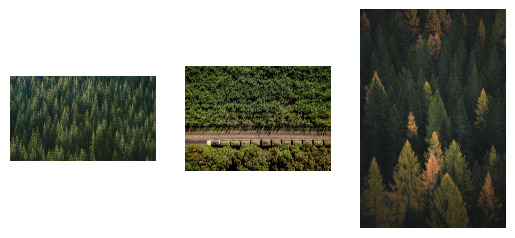

In [78]:
display_images(TRAIN_NOFIRE_NOFIRE_FORESTED)

## No Fire - Smoke confounding elements

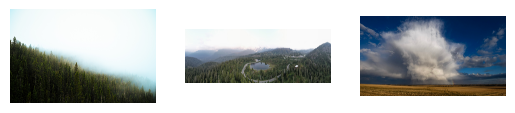

In [79]:
display_images(TRAIN_NOFIRE_NOFIRE_SMOKE)